# Проект: Принятие решений в бизнесе

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
**Задача**
<ul>
<li>Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета,</li>
<li>Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</li>
<li>Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.</li>
</ul>

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
**Задача**
Проанализируйте A/B-тест:
<ul>
<li>1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</li>
<li>2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</li>
<li>3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</li>
<li>4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.</li>
<li>5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения</li>
<li>6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</li>
<li>7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</li>
<li>8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</li>
<li>9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</li>
<li>10.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.</li>
<li>11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</li>
<li>12.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.</li>
<li>13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</li>
<li>14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.</li>
</ul>

# Выполнение проекта 

In [1]:
# Импортириуем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import math
from scipy import stats as st

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [3]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

### Ознакомление с данными и предобработка данных

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
orders.duplicated().sum()

0

In [9]:
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [10]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
visitors.duplicated().sum()

0

В таблицах orders и visitors необходимо привести столбцы с датами к правильному типу данных

In [14]:
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим количество заказов по группам

In [16]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

Также необходимо проверить является ли разница между количеством посетителей в группах значимой

In [17]:
results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

P-value:0.7301376549390499
Разница в количестве посетителей в группах A и B статистически НЕ значима



Отлично. Разница для проведения теста не значительна. Следующим этапом необходимо проверить, существуют ли пользователи, которые оказались в двух группах сразу. Это необходимо чтобы исключить проблему подглядывания.

In [18]:
groupa = orders.query('group == "A"')

In [19]:
groupb = orders.query('group == "B"')

In [20]:
ids = groupb["visitorid"]
res = groupa.query("visitorid in @ids")
res

,transactionid,visitorid,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
26,2223239646,199603092,2019-08-15,3488,A
29,2220299125,3803269165,2019-08-15,700,A
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A
1173,3612788481,2712142231,2019-08-14,2490,A
1178,4052155355,2949041841,2019-08-14,190,A
1183,1458356232,963407295,2019-08-14,4940,A


In [21]:
print('Пользователей оказавшихся в обеих группах: ', res.visitorid.nunique())

Пользователей оказавшихся в обеих группах:  58


In [22]:
print ('Всего уникальных пользователей: ', orders.visitorid.nunique())

Всего уникальных пользователей:  1031


In [23]:
print ('Уникальных пользователй в группе А: ',groupa.visitorid.nunique())
print ('Уникальных пользователй в группе В: ',groupb.visitorid.nunique())

Уникальных пользователй в группе А:  503
Уникальных пользователй в группе В:  586


Общее количество заказов в группах не совпадает: в группе А 557 заказов, в группе В - 640. Также не совпадает количество уникальных пользователкй: в группе А - 503, а в группе В - 586. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно. Что создает проблему подглядывания. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Стоит отметить, что относительно общего количестива пользователей, повторяющихся значений не так много.
Считаю, что удаление таких пользователей может сказаться не совсем корректно, ведь мы не можем выявить данных пользователей в данных visitors. Поэтому примем решение, оставить данных пользователей в обоих группах.

В остальном проблем с данными нет. Можно приступать к основной части задания

## Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез. Создадим столбец в дф с гипотезами.

In [24]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

Отсортируем их по убыванию приоритета

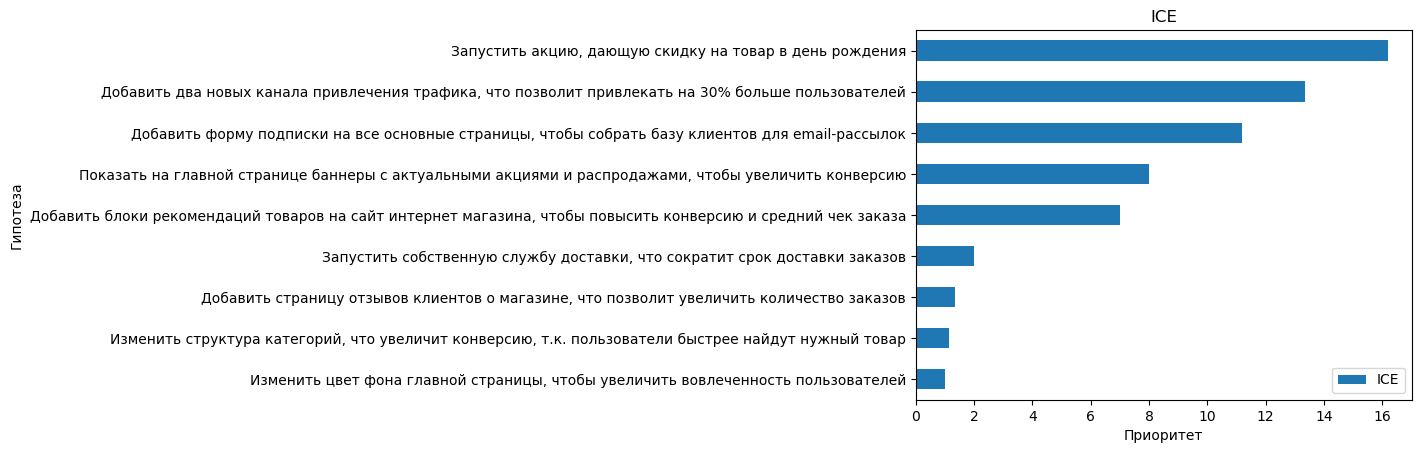

In [25]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

Теперь применим фреймворк RICE. Создадим соответствующй столбец в дф с гипотезами.

In [26]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

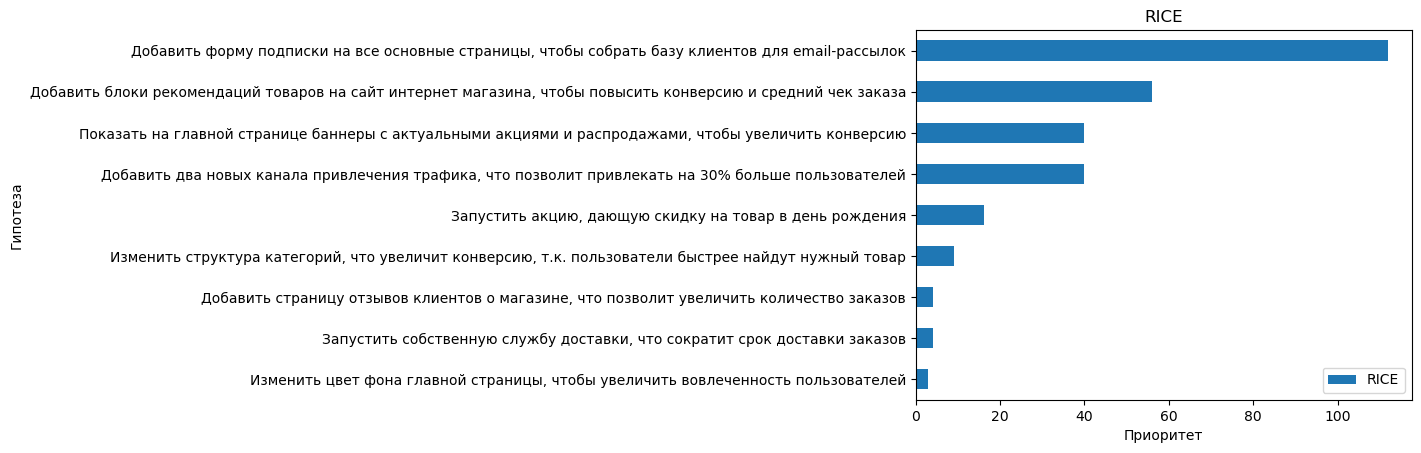

In [27]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [28]:
hypothesis.sort_values('ICE', ascending=False).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [29]:
hypothesis.sort_values('RICE', ascending=False).head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Можно проследить, что при применении фреймворков ICE и RICE результат отличается друг от друга. Это происходит потому что при расчете RICE учитывается охват. Но не смотря на различия методов этих техник приоритизации можно пронаблюдать гипотез, которые занимают лидирующие места в обоих методах.

**Вывод**

In [30]:
hypothesis_priority = hypothesis[['Hypothesis', 'ICE', 'RICE']]
hypothesis_priority.sort_values(by='ICE', ascending=False)
hypothesis_priority

,Hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
7,Добавить форму подписки на все основные страни...,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2


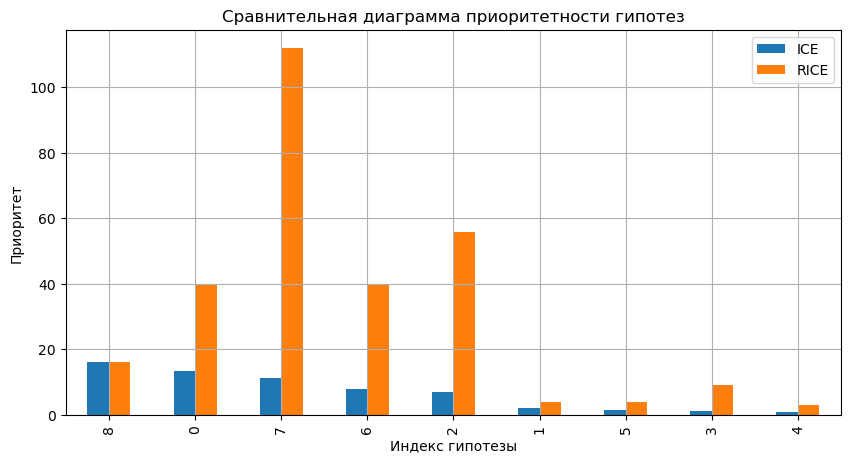

In [31]:
hypothesis_priority.sort_values(by='ICE', ascending=False).plot(kind='bar',figsize=(10,5),grid=True)
plt.title('Сравнительная диаграмма приоритетности гипотез');
plt.xlabel('Индекс гипотезы');
plt.ylabel('Приоритет');
plt.show();

Можно пронаблюдать следующие тенденции:
<ul>
<li>Фреймворк ICE предлагает следующие лидируюшие решения: Запустить акцию, дающую скидку на товар в день рождения, Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (пункты 8, 0, 7) </li>
<li>Фреймфорк RICE же предлагает немного иную приоритизацию: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа и с одинковым количеством условных единиц предлагается: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (пункты 7, 2, 0, 6)</li>
<li> Можно проследитть сходства между результатами фреймворка ICE и RICE. Наиболее удачными для реализации гипотезами будет: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (пункты 0,7,6)  </li>
</ul>

## Часть 2. Анализ A/B-теста

Создадим таблицу с кумулятивными значениями  

In [32]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [33]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней сумму с накоплением
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [34]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [35]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [36]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


### 1.	Построение графика кумулятивной выручки по группам

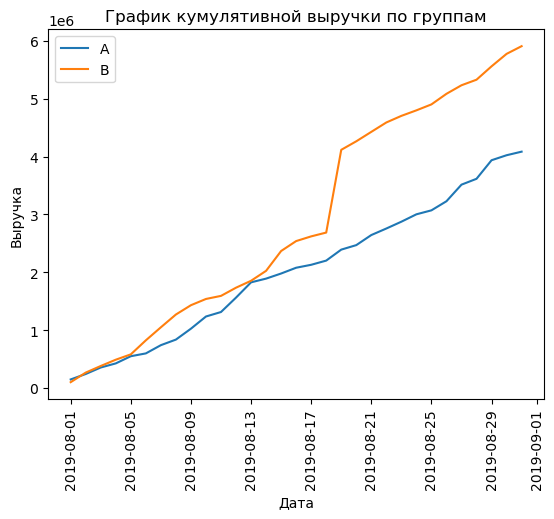

In [37]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.xticks(rotation=90)
ax.grid()
plt.legend()
plt.show()

На полученном графике можно проследить, что группа А идет стабильно и плавно. В группе В с 18 августа имеется отскок. В целом группа В в среднем приносит больше средств.

### 2. Построение графика кумулятивного среднего чека по группам

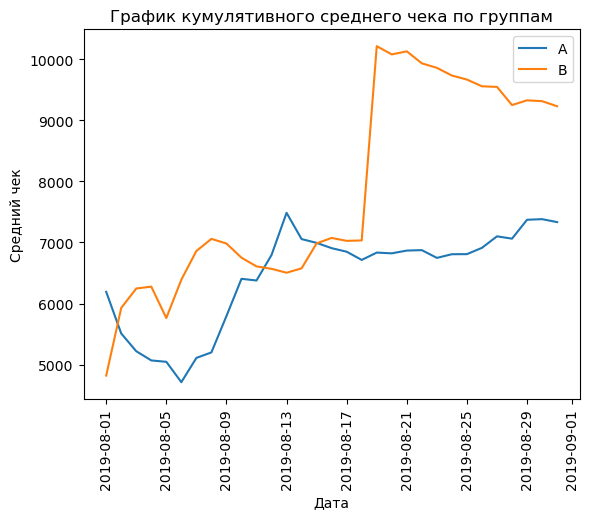

In [38]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Средний чек у группы В также расет с мощным отскоком в районке 18 августа. Группа А же в начале исследуемого периода имела снижение среднего чека. 

### 3.	Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

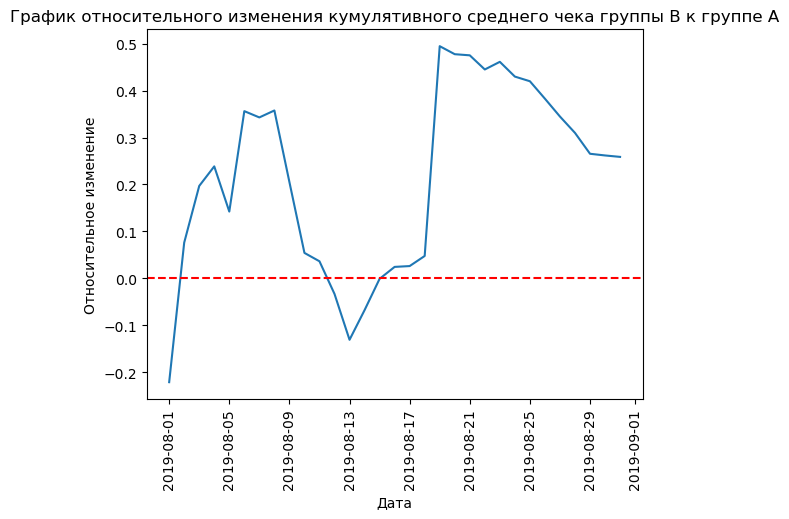

In [39]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('Дата');
plt.ylabel('Относительное изменение')
plt.show()

На полученном графике также можно заметить резкий скачок в районе 18.08.2019. 

### 4.	Построение графика кумулятивного среднего количества заказов на посетителя по группам

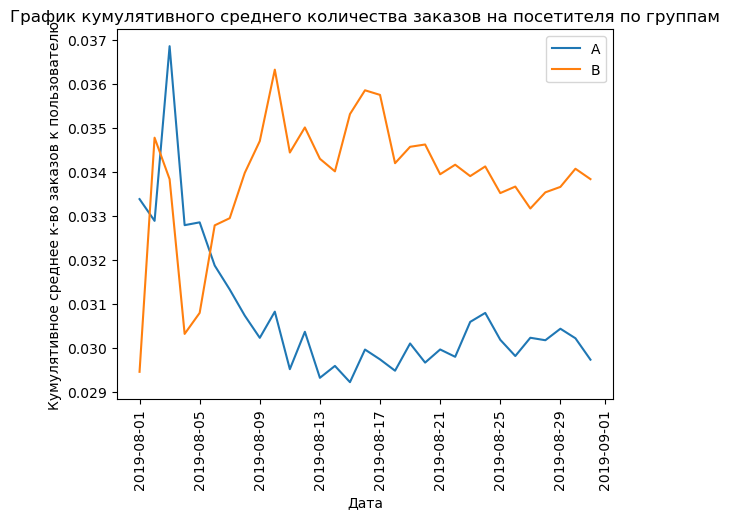

In [40]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата');
plt.ylabel('Кумулятивное среднее к-во заказов к пользователю')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Можно увидеть, что ~~конверсия~~ кумулятивный средний чек к пользователю группы В куда больше чем у группы А. Можно также пронаблюдать почти синхронный скачок у обеих групп в районе 02-03.08.2019. и Резкое падение 04.08.2019. Среднее количество заказов группы А находится в основной в диапазоне 0.03-0.031, у группы В - 0.33-0.36

### 5.	Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

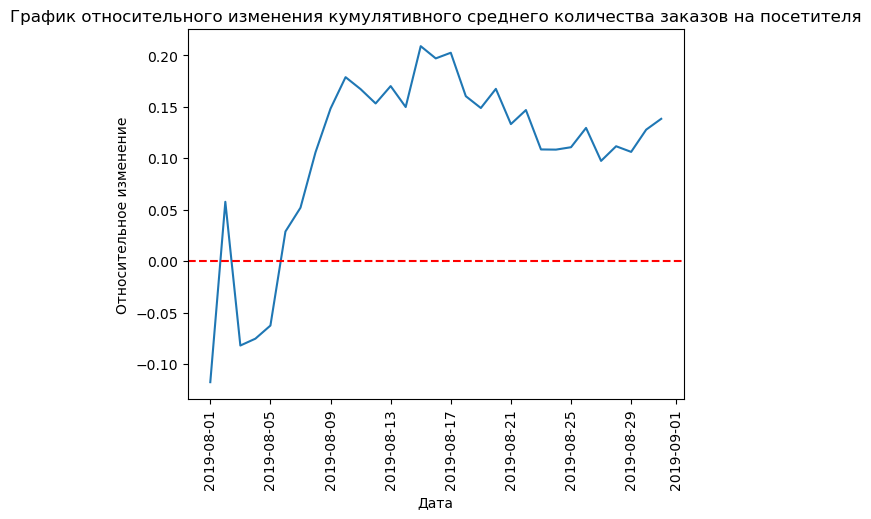

In [41]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Можно пронаблюдать, что после резкого падения 02.08.2019 начался бурный рост относительного изменения кумулятивного среднего количества заказов на посетителя.

### 6.	Построение точечного графика количества заказов по пользователям.

Создадим отдельный дф для подсчета количества заказов

In [42]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})

In [43]:
orders_per_user.orders.value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
8       1
9       1
Name: orders, dtype: int64

Построим график

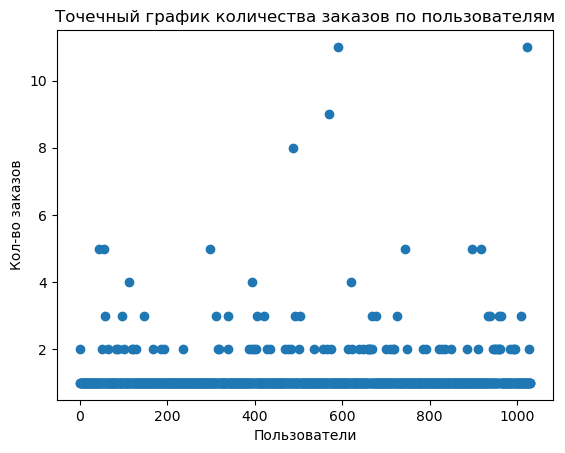

In [44]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'])
plt.title('Точечный график количества заказов по пользователям');
plt.xlabel('Пользователи');
plt.ylabel('Кол-во заказов');
plt.show()

В основном пользователи за месяц делают от одного до двух заказов. Но есть пользователи покупающие товары в интернет магазине и от 4х раз. Максимумом по заказом является 11 покупок за месяц. Либо это техническая ошибка, либо человек явно зависим от интернет магазинов :) 

### 7.	Посчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [45]:
print('90 перцентиль количества заказов: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль количества заказов: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль количества заказов: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль количества заказов: 1.00
95 перцентиль количества заказов: 2.00
99 перцентиль количества заказов: 4.00


Ранее мы уже определили, что максимальное число заказов - 11

Основной костяк из выборки заказывает 1-2 раза. Предлагаю выбрать аномалиями все, что находится за 95 перцентилем. То есть все что более 2 - аномалия

### 8.	Построение точечного графика стоимостей заказов

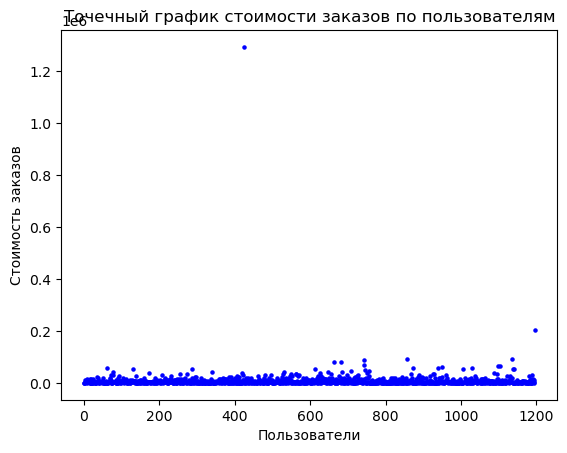

In [46]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='blue',s = 5)
plt.title('Точечный график стоимости заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

Большинство стоимостей заказов не превышают отметку в 100000. Также можно увидеть два выброса.

Рассмотрим полученный график детельнее, без учета двух выбросов

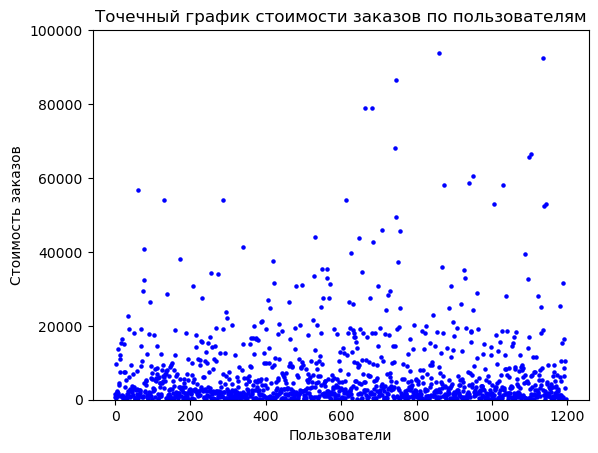

In [47]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='blue',s = 5)
plt.ylim([0, 100000])
plt.title('Точечный график стоимости заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

### 9.	Посчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [48]:
print('90 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль стоимости заказов: 18168.00
95 перцентиль стоимости заказов: 28000.00
99 перцентиль стоимости заказов: 58233.20


In [49]:
print (orders.revenue.min())
print (orders.revenue.max())

50
1294500


Считаю, что все, что находится за 95 перцентилем (28000) - аномалия. 

### 10.	Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистику по группам для дальнейшего анализа

In [50]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['visitorid', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


**Составим списки кол-ва заказов группы A и группы B со всеми пользователями по группам и проведем непараметрический тест Уилкоксона-Манна-Уитни, так как в данных есть выбросы.**

**Сформулируем гипотезы.**

- Н0: различий в среднем количестве заказов на посетителя между группами нет. 
- Н1: различия в среднем количестве заказов на посетителя между группами есть.

In [51]:

list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный показатель группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным различия в среднем между группами есть!')
else:
    print('По неочищенным данным различий в среднем количестве заказов между группами нет')


Относительный показатель группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
По неочищенным данным различия в среднем между группами есть!


### 11.	Посчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Проведем аналогичные действия со средним чеком

**Сформулируем гипотезы.**

- Н0: различий в среднем чеке между группами нет. 
- Н1: различия в среднем чеке между группами есть.

In [52]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным РАЗНИЦА в средних чеках в группах A и B разница является статитстически значимой!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.7292909855432458
По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!


### 12.	Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее мы уже определили предельные значения для стоимости и количества заказов. Сейчас необходимо создать список аномальных пользователей.

In [53]:
limit_orders = (np.percentile(orders_per_user['orders'], 95))
limit_revenue = (np.percentile(orders['revenue'], 95))

In [54]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorid'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


Рассчитаем относительные потери

In [55]:
print ('Относительные потери: ', round((len(abnormalUsers)/ orders.visitorid.nunique()),2))

Относительные потери:  0.07


Теперь очистим данные и просчитаем статистическую значимость

**Сформулируем гипотезы.**

- Н0: различий в среднем количестве заказов на посетителя между группами нет. 
- Н1: различия в среднем количестве заказов на посетителя между группами есть.

In [56]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный показатель группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным статистически значимые различия есть!')
else:
    print('По очищенным данным статистически значимых различий в конверсии между группами нет!')


Относительный показатель группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.013042592743036745
По очищенным данным статистически значимые различия есть!


### 13.	Посчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезы.**

- Н0: различий в среднем чеке между группами нет. 
- Н1: различия в среднем чеке между группами есть.

In [57]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B разница является статитстически значимой!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.738481751314565
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B нет!


### 14. Принятие решения по результатам теста

Условия проекта предлагают нам три варианта решения:
<ul>
<li>1. Остановить тест, зафиксировать победу одной из групп</li>
<li>2. Остановить тест, зафиксировать отсутствие различий между группами.</li>
<li>3. Продолжить тест.</li>
</ul>

**Вывод**

На протяжении всего исследования мы получали результаты, отражающие приемущества группы В. Кумулятивные метрики по выручке, среднему чеку почти все время лидировали в группе B. После очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. И по "сырым" и по "очищенным" данным различия в показателях по среднему к-ву заказов на покупателя групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,3% по "очищенным" и 13.8% по "сырым" данным.
Данная разница показателей между группами и до и после очистки данных является статистически значимой, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B. 